In [3]:
import json
import os
import paths
from tqdm import tqdm
from json_schema import TableSchema
import numpy as np


filenames = os.listdir(paths.JSON_FOLDER)

total_files = len(filenames)

num_table_dict = {}
num_footnotes_dict = {}
num_references_dict = {}
num_tab_ref_dict = {}

num_articles_extra_ref = 0

total_tables = 0
total_footnotes = 0
total_references = 0


for filename in tqdm(filenames, desc="Processing JSON files", unit=" file", colour="green", disable=True):

    num_tables = 0
    num_footnotes = 0
    num_references = 0

    with open(f"{paths.JSON_FOLDER}/{filename}", "r", encoding="utf-8") as file:
        data = json.load(file)
        
        for table_id in data:
            table = data[table_id]
 
            footnotes = table['footnotes']
            references = table['references']

            if table['table']:
                num_tables += 1

            if footnotes:
                num_footnotes += len(footnotes)
            
            if references:
                num_references += len(references)

    if num_tables < num_references:
        num_articles_extra_ref += 1

    if num_table_dict.get(num_tables) is None:
        num_table_dict[num_tables] = 0
    
    num_table_dict[num_tables] += 1

    if num_footnotes_dict.get(num_footnotes) is None:
        num_footnotes_dict[num_footnotes] = 0

    num_footnotes_dict[num_footnotes] += 1

    if num_references_dict.get(num_references) is None:
        num_references_dict[num_references] = 0

    num_references_dict[num_references] += 1

    if num_tables != 0:
        num_tab_ref_dict[filename] = num_references / num_tables

    total_tables += num_tables
    total_footnotes += num_footnotes
    total_references += num_references

sorted_dict_by_keys = dict(sorted(num_table_dict.items()))
sorted_footnotes_by_keys = dict(sorted(num_footnotes_dict.items()))
sorted_references_by_keys = dict(sorted(num_references_dict.items()))

print(f"Total articles: {len(filenames)}")
print(f"Total tables: {total_tables}")
print(f"Articles with more references than the number of tables: {num_articles_extra_ref}")

print(sorted_dict_by_keys)
print('\n')
print(sorted_footnotes_by_keys)

Total articles: 653
Total tables: 3462
Articles with more references than the number of tables: 265
{0: 71, 1: 64, 2: 81, 3: 79, 4: 57, 5: 65, 6: 48, 7: 38, 8: 31, 9: 31, 10: 15, 11: 19, 12: 7, 13: 10, 14: 6, 15: 4, 16: 4, 17: 3, 18: 3, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1, 24: 1, 25: 1, 28: 1, 35: 1, 42: 2, 44: 1, 52: 1}


{0: 306, 1: 10, 2: 26, 3: 21, 4: 23, 5: 11, 6: 22, 7: 4, 8: 23, 9: 10, 10: 9, 11: 3, 12: 15, 13: 2, 14: 12, 15: 9, 16: 4, 18: 14, 20: 7, 21: 7, 22: 5, 24: 10, 25: 1, 26: 2, 27: 1, 28: 4, 30: 9, 32: 3, 33: 1, 35: 2, 36: 1, 39: 1, 40: 5, 42: 4, 45: 4, 46: 1, 48: 2, 49: 1, 50: 2, 54: 1, 55: 3, 56: 3, 57: 1, 60: 2, 63: 2, 64: 1, 65: 3, 66: 3, 68: 1, 70: 2, 72: 3, 80: 2, 84: 3, 85: 1, 88: 1, 96: 1, 98: 1, 99: 1, 100: 1, 105: 1, 108: 1, 112: 1, 117: 1, 128: 1, 132: 1, 138: 1, 153: 1, 154: 1, 172: 1, 176: 1, 184: 1, 187: 1, 240: 2, 336: 1, 418: 1, 525: 1, 528: 1, 2600: 1}


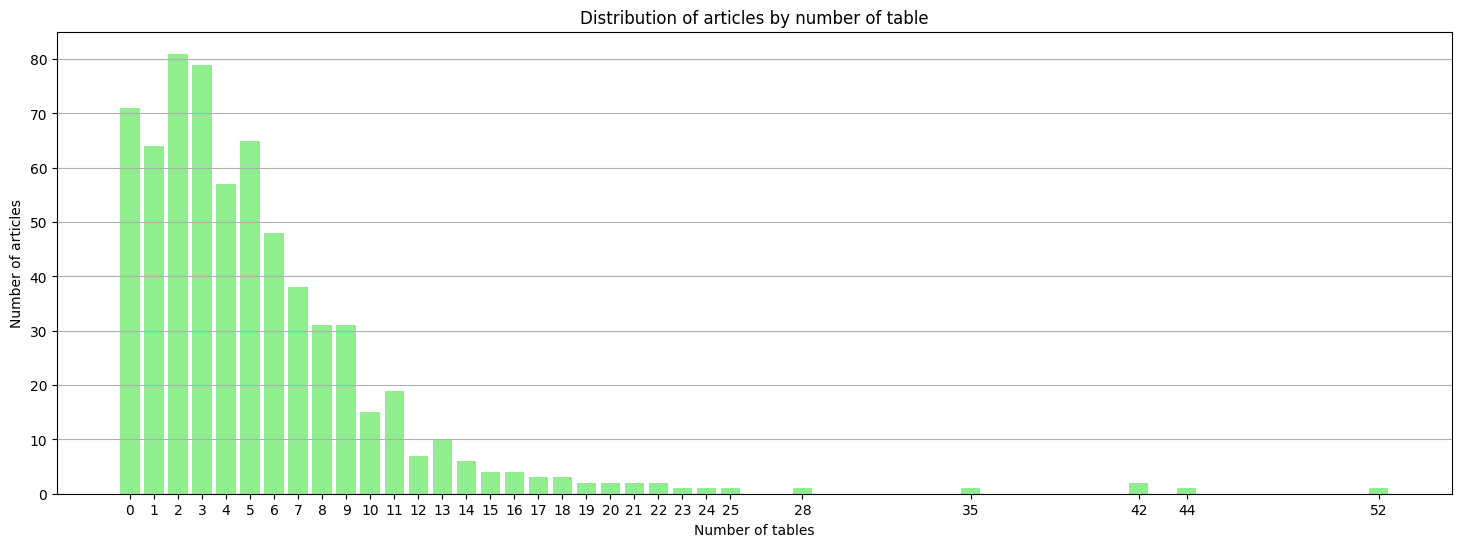

In [3]:
import matplotlib.pyplot as plt

keys = list(sorted_dict_by_keys.keys())
values = list(sorted_dict_by_keys.values())

plt.figure(figsize=(18, 6))
plt.bar(keys, values, color='lightgreen')

plt.xlabel('Number of tables')
plt.ylabel('Number of articles')
plt.title('Distribution of articles by number of table')
plt.xticks(keys) 

plt.grid(axis='y')
plt.show()

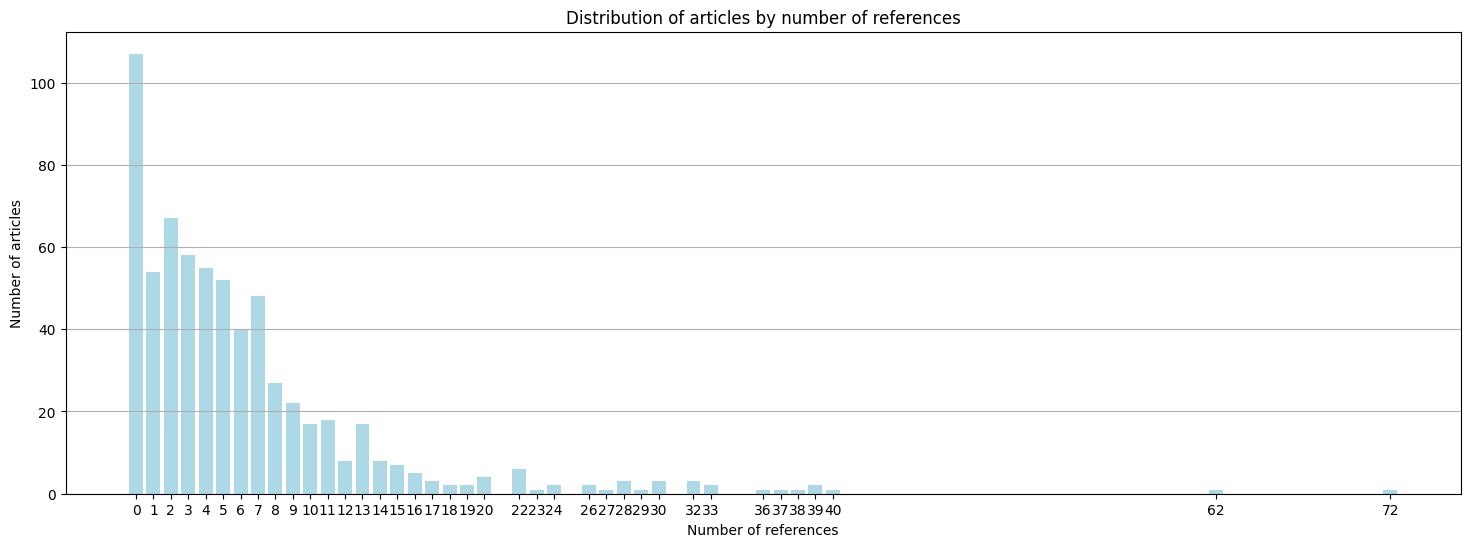

In [4]:
keys = list(sorted_references_by_keys.keys())
values = list(sorted_references_by_keys.values())

plt.figure(figsize=(18, 6))
plt.bar(keys, values, color='lightblue')

plt.xlabel('Number of references')
plt.ylabel('Number of articles')
plt.title('Distribution of articles by number of references')
plt.xticks(keys) 

plt.grid(axis='y')
plt.show()

5
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0]
[38, 1, 6, 6, 5, 16, 11, 12, 20, 1, 206, 55, 30, 40, 18, 26, 17, 10, 10, 0, 26, 2, 6, 4, 1, 2, 2, 0, 0, 0, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.09090909090909091, 0.16666666666666666, 0.22857142857142856, 0.25, 0.25, 0.2619047619047619, 0.2857142857142857

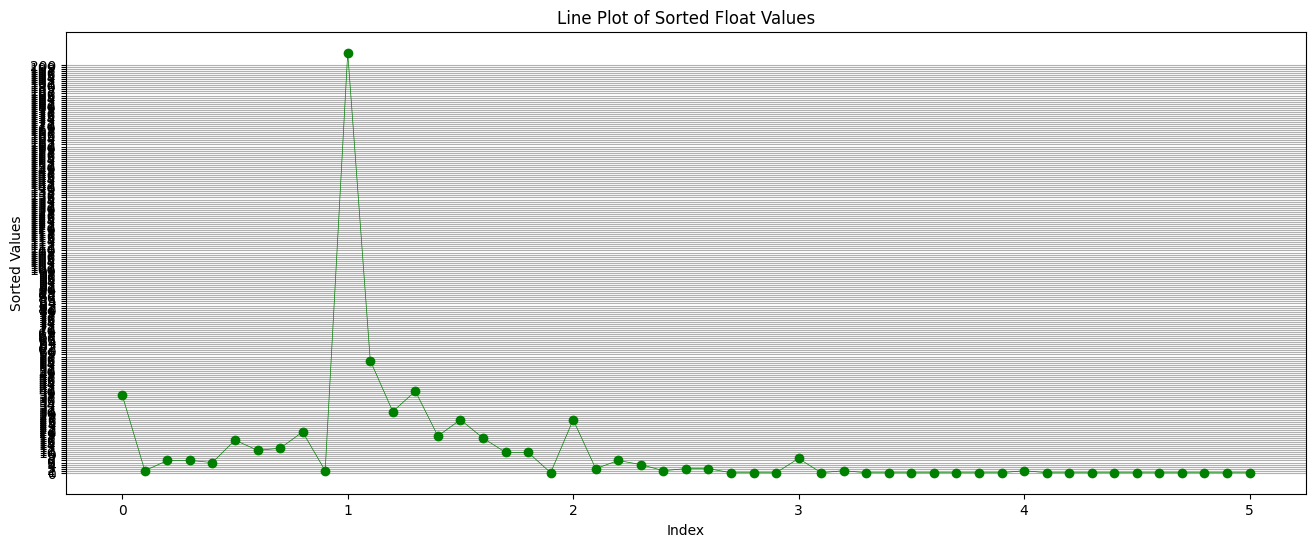

In [50]:

sorted_by_values = sorted(num_tab_ref_dict.values())

max_value = sorted_by_values[-1]

def count_floats_in_intervals(intervals):
    # Initialize a dictionary to hold the counts
    counts = {interval: 0 for interval in intervals}

    # Iterate through each float in the array
    for num in sorted_by_values:
        # Check each interval
        
        for i in range(len(intervals) - 1):
            if intervals[i] <= num < intervals[i + 1]:
                if counts.get(intervals[i]) is None:
                    counts[intervals[i]] = 0
                counts[intervals[i]] += 1

    return counts

# Example usage
print(int(max_value))
intervals = [i * 0.1 for i in range(int(max_value * 10) + 1)]

result = count_floats_in_intervals(intervals)

interval_labels = list(result.keys())
counts = list(result.values())

print(interval_labels)
print(counts)
indices = list(range(len(list(sorted_by_values))))
print(sorted_by_values)
plt.figure(figsize=(16, 6))
plt.plot(interval_labels, counts, marker='o', color='green', linestyle='-', linewidth=0.5)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Sorted Values')
plt.title('Line Plot of Sorted Float Values')
plt.xticks([i for i in range(int(max_value) + 1)])  # Set x-ticks to match the indices


# Show the plot with grid
plt.grid(axis='y')
plt.show()

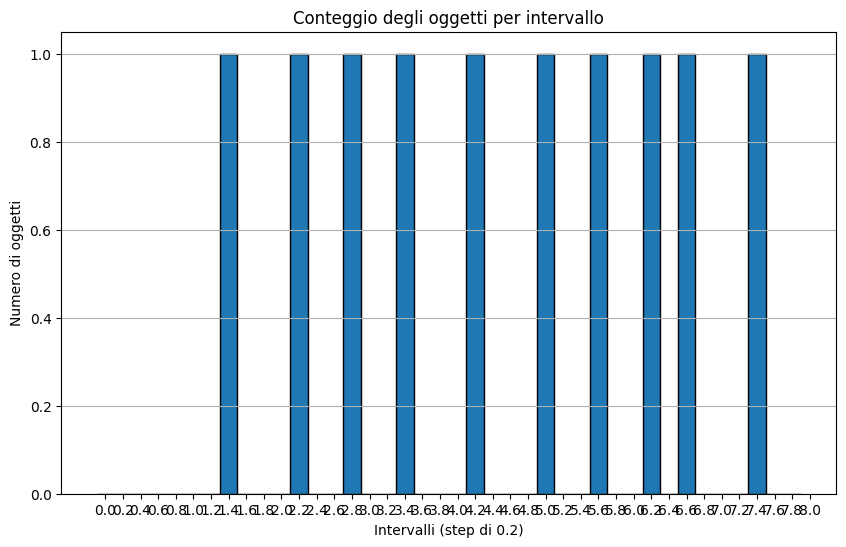

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def count_floats_in_intervals(float_array, step, n):
    # Crea gli intervalli
    intervals = [(i, i + step) for i in np.arange(0, n, step)]
    
    # Inizializza un dizionario per tenere traccia dei conteggi
    counts = {interval: 0 for interval in intervals}

    # Conta i numeri per ciascun intervallo
    for num in float_array:
        for interval in intervals:
            lower, upper = interval
            if lower <= num < upper:
                counts[interval] += 1
                break

    return counts, intervals

# Dati di esempio
float_array = [1.5, 2.3, 2.9, 3.6, 4.2, 5.1, 5.7, 6.2, 6.8, 7.5]
n = 8
step = 0.2

# Conta gli oggetti negli intervalli
counts, intervals = count_floats_in_intervals(float_array, step, n)

# Prepara i dati per il plot
x_values = [interval[0] for interval in intervals]
y_values = [counts[interval] for interval in intervals]

# Crea il plot
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, width=step, edgecolor='black')
plt.xticks(np.arange(0, n + step, step))
plt.xlabel('Intervalli (step di 0.2)')
plt.ylabel('Numero di oggetti')
plt.title('Conteggio degli oggetti per intervallo')
plt.grid(axis='y')